In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
data=pd.read_csv('netflix_titles.csv')

# Exploring the data

In [297]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [298]:
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [300]:
data.shape

(8807, 12)

In [301]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

# data cleaning

In [385]:
data[data.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8804,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8805,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
data[data.notnull().head(20)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


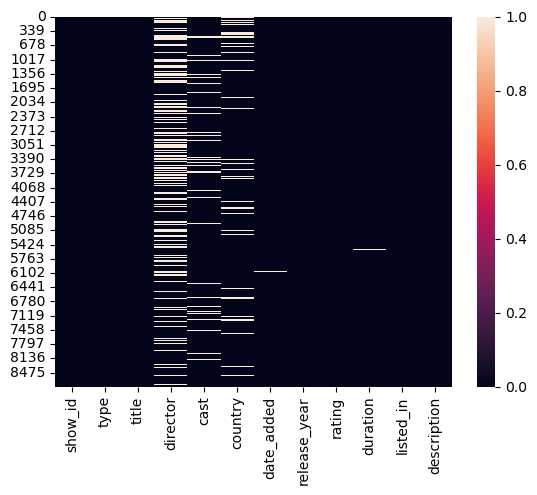

In [304]:
sns.heatmap(data.isnull())
plt.show()

In [305]:
data.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [306]:
data.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Data Analysis

In [307]:
data.groupby('type').sum()

C:\Users\Aditya Kumar\AppData\Local\Temp\ipykernel_15136\660642947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('type').sum()


,release_year
type,
Movie,12342448
TV Show,5396437


In [308]:
data.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [309]:
#1. Movie vs TV Show Distribution

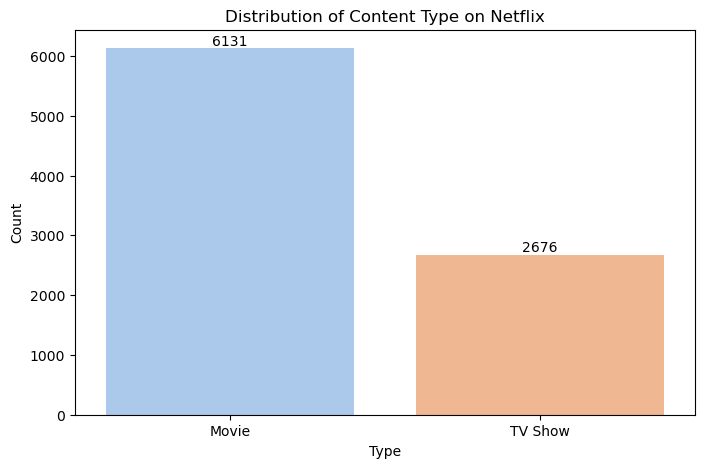

In [310]:
plt.figure(figsize=(8, 5))

# Create the count plot and store the Axes object
ax = sns.countplot(data=data, x='type', palette='pastel')

# Add labels to bars
for bars in ax.containers:  # Use ax, 
    ax.bar_label(bars)  # Use ax.bar_label, 
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

In [311]:
# 2. Top 10 Most Common Genres

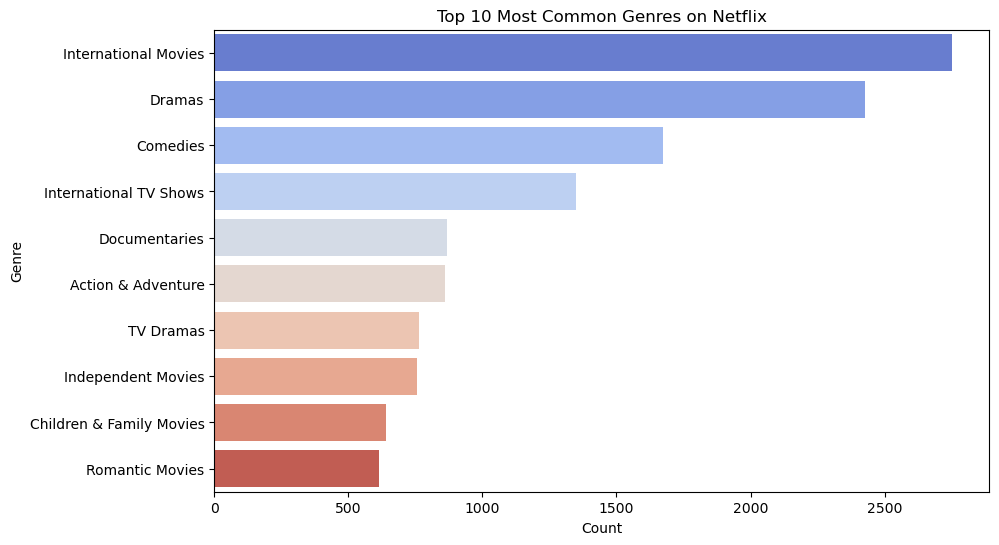

In [312]:
plt.figure(figsize=(10, 6))
genres = data['listed_in'].str.split(', ').explode()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='coolwarm')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

In [313]:
# 3. Releases Per Year

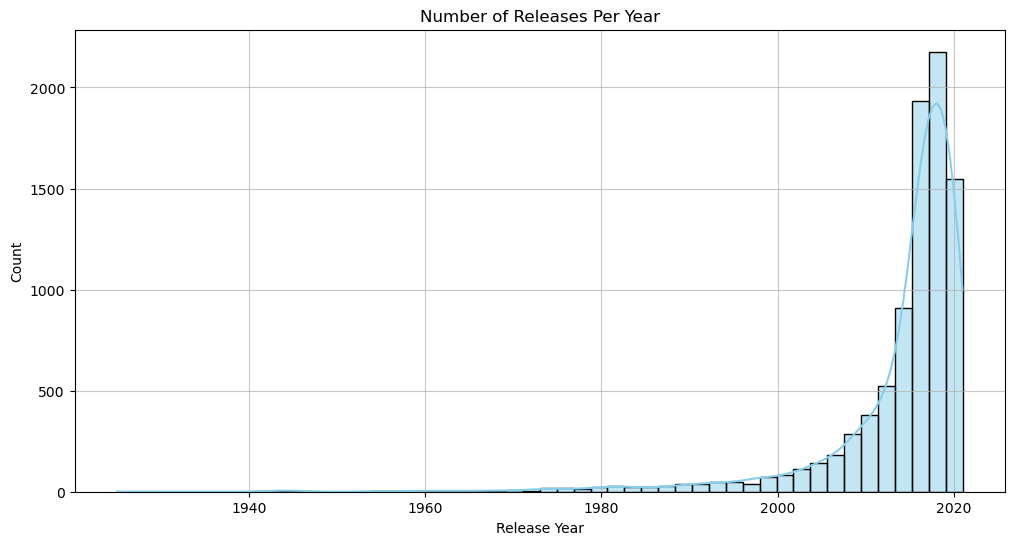

In [355]:
plt.figure(figsize=(12, 6))
sns.histplot(data['release_year'], bins=50, kde=True, color='skyblue')
plt.grid(True, linestyle="-", alpha=0.7)
plt.title('Number of Releases Per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

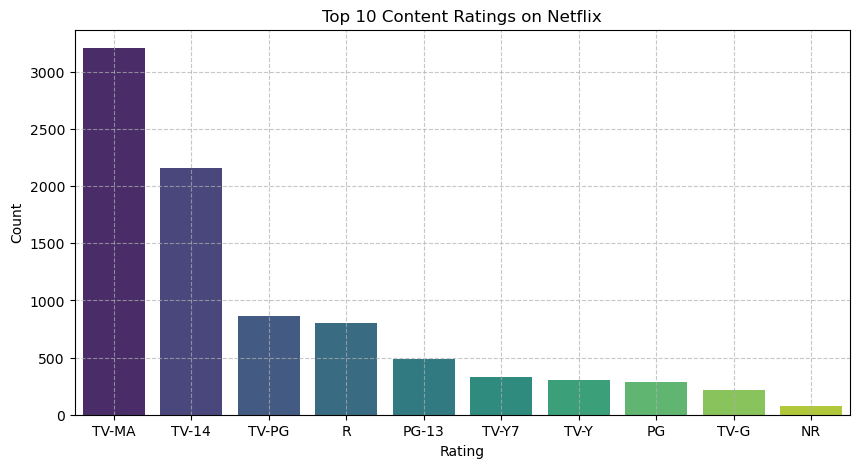

In [352]:
# 4. Content Ratings Distribution
plt.figure(figsize=(10, 5))
top_ratings = data['rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='viridis')
plt.grid(True, linestyle="--", alpha=0.7)
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

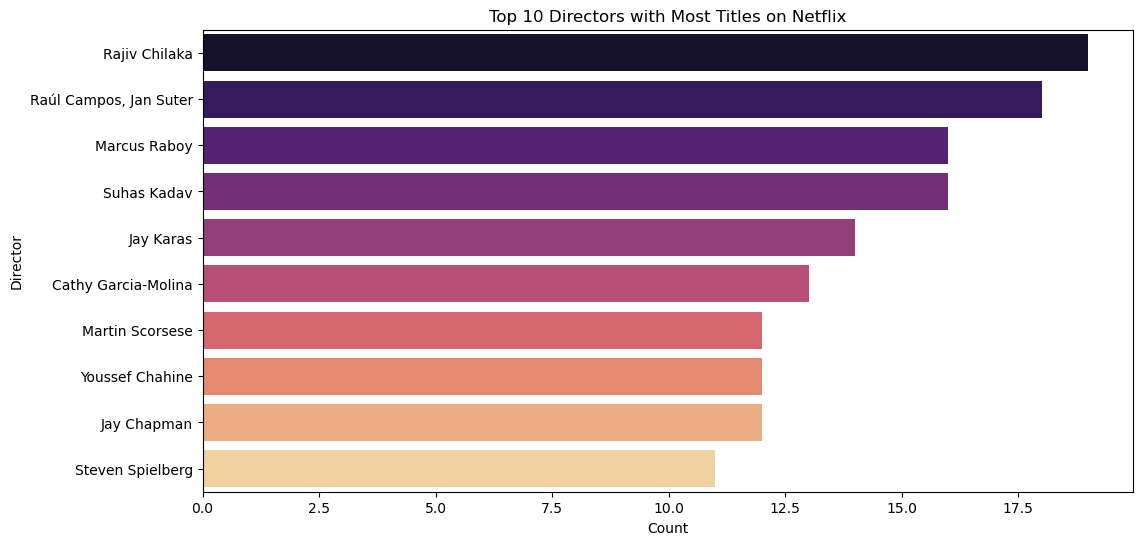

In [316]:
# 5. Top 10 Directors with Most Titles


plt.figure(figsize=(12, 6))
top_directors = data['director'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors with Most Titles on Netflix')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()


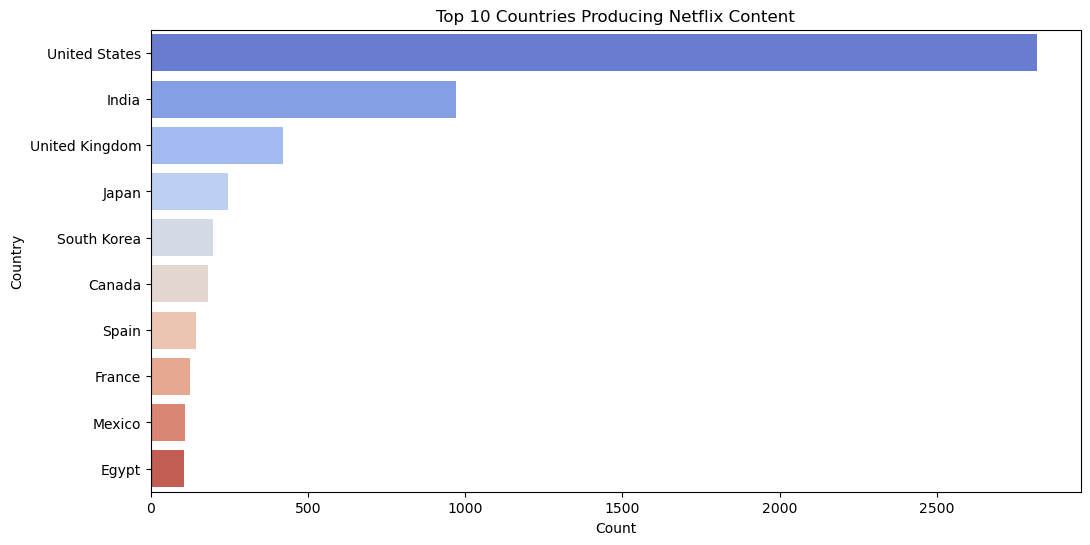

In [317]:
# 6. Top 10 Countries Producing Content

plt.figure(figsize=(12, 6))
top_countries = data['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [318]:
# Ensure 'date_added' is in datetime format

data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
# Extract the year
data['year_added'] = data['date_added'].dt.year

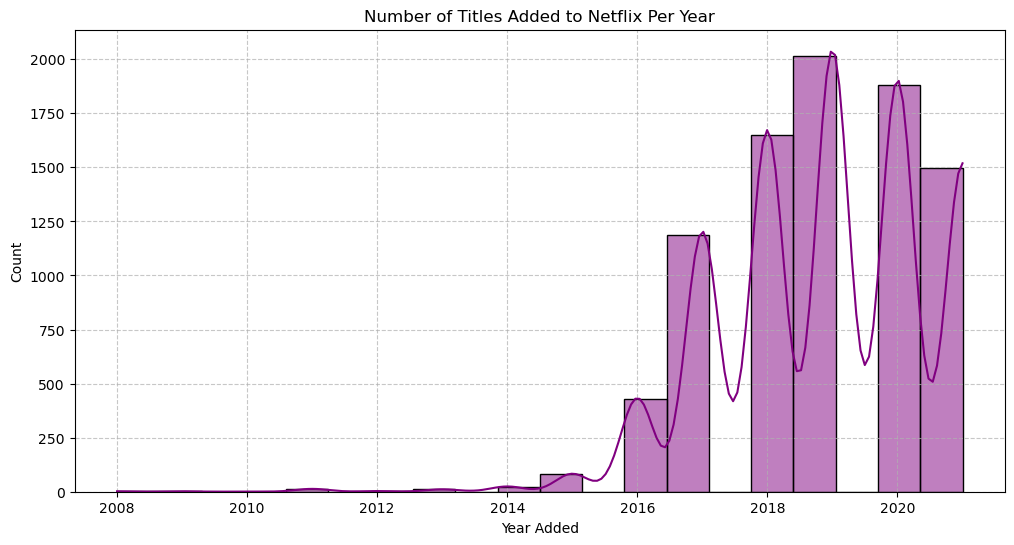

In [351]:
# 7. Year-wise Netflix Additions

plt.figure(figsize=(12, 6))
data['year_added'] =data['date_added'].dt.year
sns.histplot(data['year_added'].dropna(), bins=20, kde=True, color='purple')
plt.grid(True, linestyle="--", alpha=0.7)
plt.title('Number of Titles Added to Netflix Per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.show()

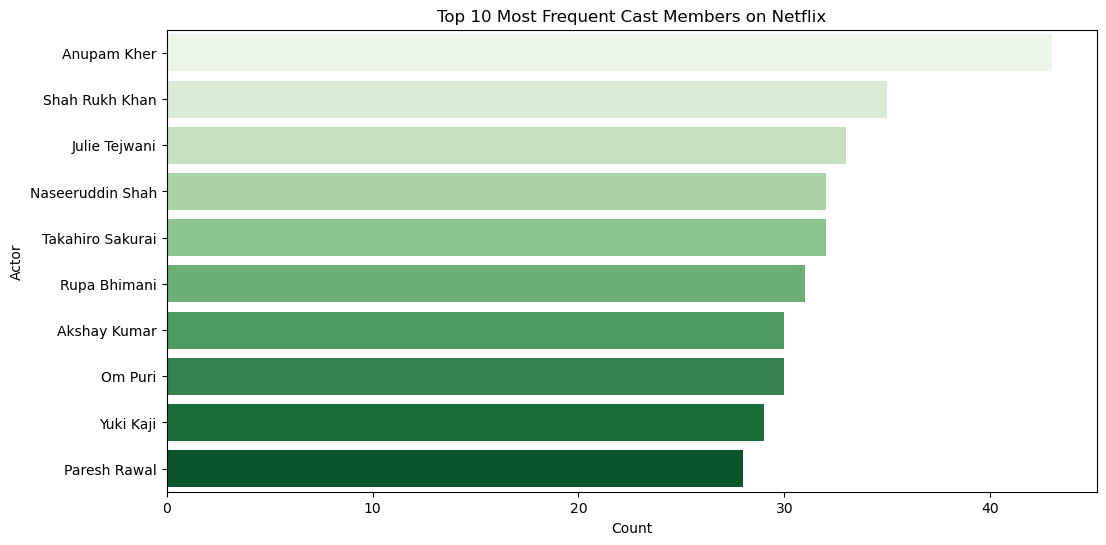

In [320]:
# 8. Most Frequent Cast Members

plt.figure(figsize=(12, 6))
cast_members = data['cast'].str.split(', ').explode()
top_cast = cast_members.value_counts().head(10)
sns.barplot(x=top_cast.values, y=top_cast.index, palette='Greens')
plt.title('Top 10 Most Frequent Cast Members on Netflix')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

In [ ]:
#9. What is the distribution of movie duration and TV show seasons?


In [322]:
print(data.columns)


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added'],
      dtype='object')


In [353]:
# Separate Movies and TV Shows
df_movies = data[data["type"] == "Movie"].dropna(subset=["duration"])
df_shows = data[data["type"] == "TV Show"].dropna(subset=["duration"])

# Process Movie Durations
df_movies["duration"] = df_movies["duration"].str.replace(" min", "").astype(int)

# Process TV Show Seasons (convert "1 Season" to 1, "2 Seasons" to 2, etc.)
df_shows["duration"] = df_shows["duration"].str.replace(" Season", "").str.replace("s", "").astype(int)



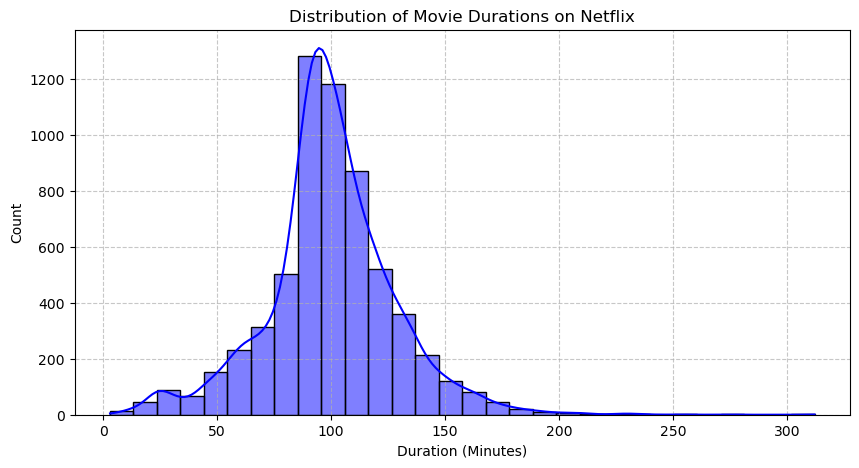

In [354]:
# Plot Movie Durations Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df_movies["duration"], bins=30, kde=True, color="blue")
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

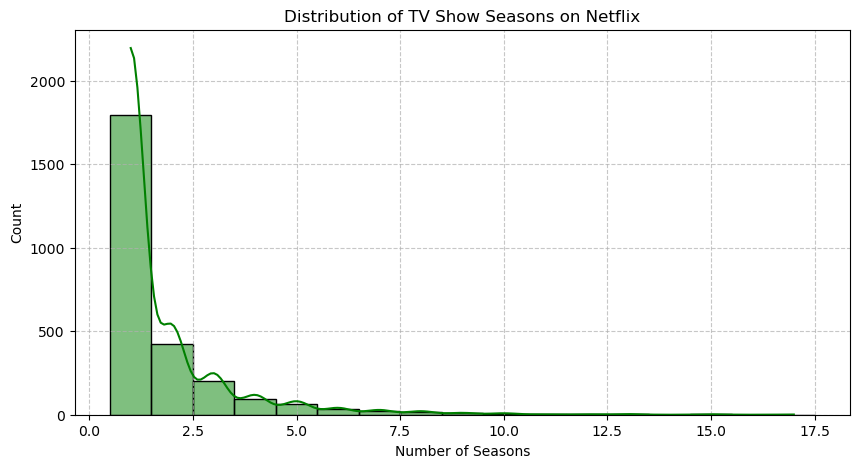

In [347]:

# TV Show Seasons Distribution

plt.figure(figsize=(10, 5))
sns.histplot(df_shows["duration"], bins=15, kde=True, color="green", discrete=True)
plt.grid(True, linestyle="--", alpha=0.7)
plt.title("Distribution of TV Show Seasons on Netflix")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()

In [379]:
# 10.How has the number of movies and TV shows added to Netflix changed over time?

<Figure size 1200x600 with 0 Axes>

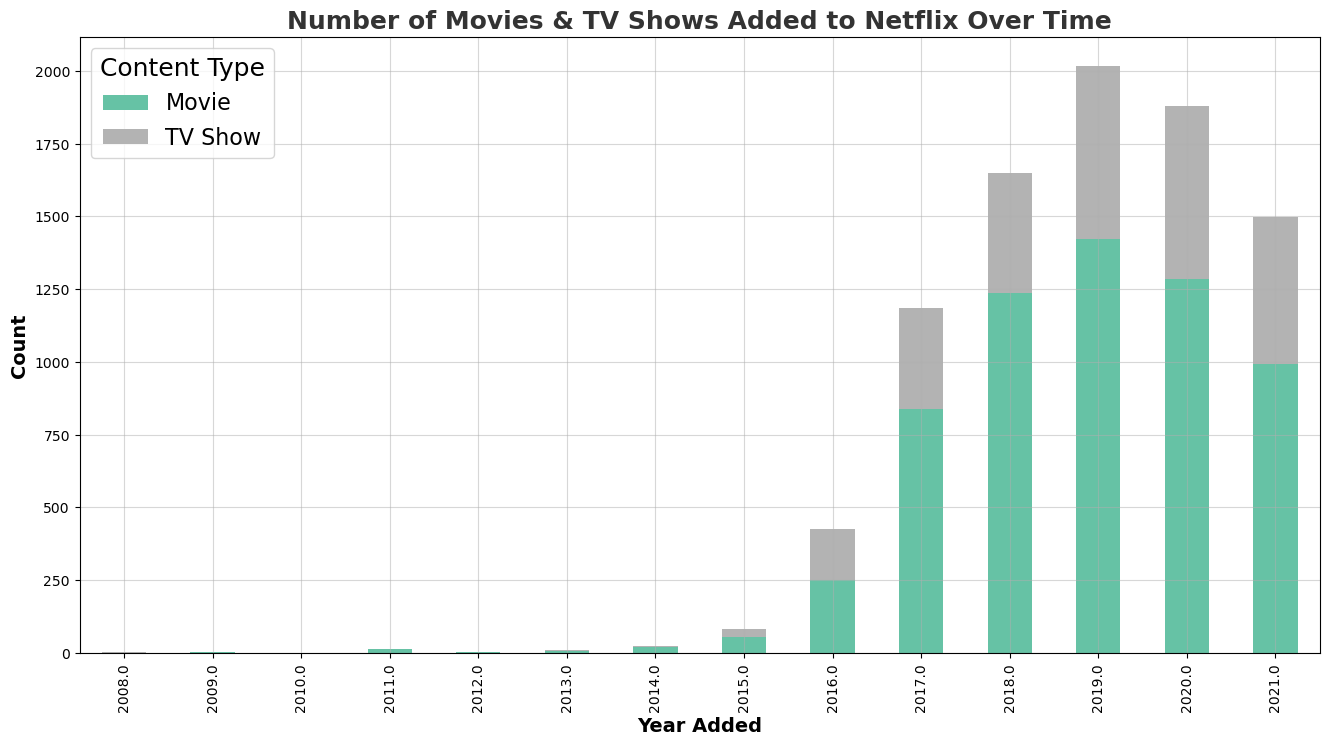

In [378]:
# Plot the trend
plt.figure(figsize=(12, 6))
added_per_year.plot(kind="bar", stacked=True, figsize=(16, 8), colormap="Set2")

# Titles and Labels
plt.title("Number of Movies & TV Shows Added to Netflix Over Time", fontsize=18, fontweight="bold", color="#333")
plt.xlabel("Year Added", fontsize=14, fontweight="bold")
plt.ylabel("Count", fontsize=14, fontweight="bold")

plt.legend(title="Content Type", fontsize=16, title_fontsize=18, loc="upper left")
plt.grid(True, linestyle="-", alpha=0.5)

plt.show()
